In [124]:
import os
import random
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

## Inicialização de workspace

In [2]:
current_working_directory = os.getcwd()
datasets_folder = f'{current_working_directory}/datasets'

In [118]:
def knn(dataset, k):
    knn = []
    for a in range(len(dataset)):
        for b in range(len(dataset)):
            if a != b:
                iris_data_a = dataset[a]['np_data']
                iris_data_b = dataset[b]['np_data']
                distancia = distance.euclidean(iris_data_a,iris_data_b)
                knn.append({
                    'distancia': distancia,
                    'classe_a': dataset[a]['class'],
                    'classe_b': dataset[b]['class']
                })
    knn.sort(key = lambda x:x['distancia'])
    return knn[:k]

## Iris Dataset

In [8]:
with open(f'{datasets_folder}/iris/iris.data') as iris_data:
    iris_file = iris_data.read().split('\n')[:-2]

In [9]:
iris_classes = {}
classification = 1
iris_dataset= []
for row in iris_file:
    current_row = row.split(',')
    name = current_row[-1]
    if name not in iris_classes:
        iris_classes[name] = classification
        classification += 1
    np_data = np.array(current_row[:-1]).astype(np.float)
    iris_dataset.append({
        'np_data': np_data,
        'class': iris_classes[name]
    })
            
print(iris_classes)
print(iris_dataset[0])

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
{'np_data': array([5.1, 3.5, 1.4, 0.2]), 'class': 1}


In [37]:
def chunk_data(dataset, n = 10):
    random.shuffle(dataset)
    dataset_chunked = []
    chunk_size = len(dataset)//n
    for i in range(n):
        start = i*chunk_size
        end = (i+1)*chunk_size
        dataset_chunked.append(iris_dataset[start:end])
    return dataset_chunked

In [92]:
def calcula_acuracia(conjunto):
    acertos = 0
    for x in conjunto:
        if x['classe_a'] == x['classe_b']:
            acertos +=1
    return (float)(acertos*100)/len(conjunto)

In [ ]:
def cross_validation(dataset):    
    validation = []
    chunked_data = chunk_data(dataset)
    for k in [3,5,7,9,15]:
        acuracias = []
        for chunk in chunked_data:
            k_vizinhos = knn(chunk, k)
            acuracias.append(calcula_acuracia(k_vizinhos))
        validation.append({
#                 'accuracias': acuracias,
                'k_value': k,
                'media': np.mean(acuracias),
                'mediana': np.median(acuracias),
                'desvio_padrao': np.std(acuracias)
            })
    return validation


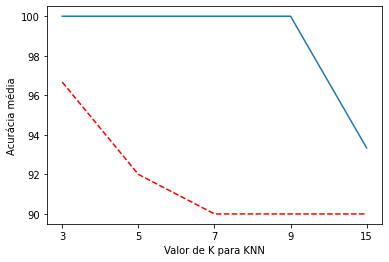

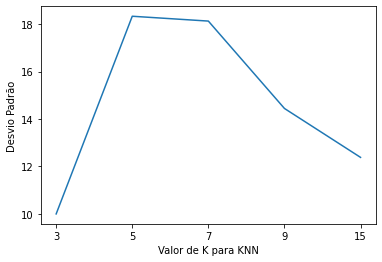

In [180]:
acuracias = cross_validation(iris_dataset)
k_values = ['3','5','7','9','15']
retira_medias =  lambda x:x['media']
retira_mediana =  lambda x:x['mediana']
retira_desvio_padrao =  lambda x:x['desvio_padrao']

medias = [retira_medias(x) for x in acuracias ]

desvio_padrao = [retira_desvio_padrao(x) for x in acuracias ]

mediana = [retira_mediana(x) for x in acuracias ]

plt.plot(k_values, medias,'r--',k_values, mediana)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia média')
plt.show()

plt.plot(k_values, desvio_padrao)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Desvio Padrão')
plt.show()
